<div style="background-color: #f5f5f5; padding: 10px; border-radius: 5px;">
    <div class="card mt-3">
        <div class="card-body">
            <h2 class="card-title text-center mb-4">Re-implmentation of Paper <strong>Attention All you need</strong> </h2>
            <p>In this section : we will code tow versions of self-Attention Numpy version and Torch Built Self-Attention. </p>
            <p>Recently all the most State-of-The-Art model in NLP is based on <strong>Self-Attention Mechanism</strong> because is Powerfull neural network Architucture to learn in parallel and extarct important feartures from data that why Self-Attention is Data hungry is require hugh amount of data to learn from even it's comes with own limitation we will mention at the end of Notebook</p>
            <div class="alert alert-warning">
                <p><strong>Reading:</strong> For more information about Self-Attention , please refer to the following paper: </p>
                <ul>
                    <li><a href="https://arxiv.org/abs/1706.03762">Attention All you need Sequentail modeling Seq2Seq</a></li>
                </ul>
            </div>
        </div>
            </div>
        </div>

<div style="background-color: #f5f5f5; padding: 10px; border-radius: 5px;">
    <div class="card mt-3">
        <div class="card-body">
            <h2 class="card-title text-center mb-4">Self-Attention</h2>
            <p>Self-Attention is a mechanism used in neural networks, particularly in the Transformer model, to capture the importance of different words in a sentence or sequence. The mathematical formula for Self-Attention is as follows:</p>
            <center><img src="https://latex.codecogs.com/svg.image?\text{Attention}(Q,K,V)&space;=&space;\text{softmax}\left(\frac{QK^T}{\sqrt{d_k}}\right)V" title="Attention(Q,K,V)=softmax(QKT/sqrt(d_k))V" style="background-color:gray; padding: 10px; border-radius: 5px;"/>
</center>
            <p>Where:</p>
            <ul>
                <li>$Q$ is the Query matrix</li>
                <li>$K$ is the Key matrix</li>
                <li>$V$ is the Value matrix</li>
                <li>$d_k$ is the dimension of $K$ (or $Q$)</li>
                <strong>Note:</strong><p>the Matrcies are learnble wieghts</p>
            </ul>
        </div>
    </div>
</div>

In [1]:
import torch
import numpy as np 
import torch.nn as nn 
import matplotlib.pyplot as plt 
from mpl_toolkits.axes_grid1 import make_axes_locatable
import math

<div style="background-color: #f5f5f5; padding: 10px; border-radius: 5px;">
    <div class="card mt-3">
        <div class="card-body">
            <h2 class="card-title text-center mb-4">Self-Attention componentes</h2></br>
            <strong>Notation : all the mentioned ideas here comes from this book called DL2 </strong>
            <div class="alert alert-success">
                <p><strong>Reading:</strong> For more information about Self-Attention and mathematic , please refer to the following Book: </p>
<ul>
    <li><a href="https://d2l.ai/index.html2">Dive into Deep Learning</a></li>
                </ul>
    </div>
       <p>Self-Attention Mechanism (SAM) creete to imporve sequenctial modeling performence that solve recuccrent and long memory which was most limittaion comes over LTSM and RNN models and one of most archive by SAM is Parallel process of sequences we dived the this process by Query and Key and Value easise way to ullistat how does SAM works by taking for example Database search called <strong>look-up Table</strong>
                <ul>
                    <li>Query : is the SLQ commmand that goes into Database system to find any similar content</li>
                    <li>Key :paly the role of what're you looking for such for Key=="Deep learning Course"</li>
                    <li>Value : we can say is target content we want to have</li></ul><p> may ask yourself since that Query and Key and Value a have different means but the feed the same input of data ,here where's SAM comes to play around and find similarty between Q and K , V now let us first defined SAM formula in depth </p>
       </div>
    </div>
    </div>


<div style="background-color: #f5f5f5; padding: 10px; border-radius: 5px;">
    <div class="card mt-3">
        <div class="card-body">
            <h2 class="card-title text-center mb-4">Explain mechanism of Attention in Encoder Part</h2>
            <ul><li>
                <strong>Dot Product of Query Transpose and Key</strong><center>
                Let us consider a sequence of $n$ embeddings $\mathbf{E} = [\mathbf{e_1}, \mathbf{e_2}, \ldots, \mathbf{e_n}]$. 
                
##### <strong>Step 1: intialize the learnbel wieghts matrices</br> Query, Key, Value</strong>
                
We create three linear projections of each embedding $\mathbf{e_i}$ using three learned matrices $\mathbf{W_Q}$, $\mathbf{W_K}$, $\mathbf{W_V}$:
\begin{align*}
\mathbf{Q_i} &= \mathbf{W_Q} \mathbf{e_i} \\
\mathbf{K_i} &= \mathbf{W_K} \mathbf{e_i} \\
\mathbf{V_i} &= \mathbf{W_V} \mathbf{e_i}
\end{align*}
                
These projections are called the **Query**, **Key**, and **Value** matrices, respectively.
                <center><img src="https://wikidocs.net/images/page/178172/Fig_08_03.png" width="500" height="500"/></center>
        
##### <strong>Step 2: Dot-Product Similarity</strong>

We then compute the dot-product similarity between the Query ($\mathbf{Q}$) and Key ($\mathbf{K}$) matrices:

\begin{equation*}
\text{Similarity}(\mathbf{Q}, \mathbf{K}) = \mathbf{Q} \mathbf{K}^T
\end{equation*}

This results in a square matrix of size $n \times n$.</center>
            <strong>Summary First Step</strong><p>the reason behind doing the dot product is to calculate the similarity between to Vectors in Eucldien Space which means tell us how much two vector are close to each but the output from Dot product not Scale that's why we need to averge the out weights matrix between 1 and 0</p>
            </li>
        <li>
           <strong>Attention Scoring Functions</strong><center>       
\begin{equation*}
\mathbf{S} = \text{softmax}(\text{Similarity}(\mathbf{Q}, \mathbf{K})) = \text{softmax}(\mathbf{Q} \mathbf{K}^T)
\end{equation*}

The softmax function ensures that the weights for each Value are positive, and sum to 1.
            <p><center><p>The dot product between both vectors has zero mean and a variance of . To ensure that the variance of the dot product still remains one regardless of vector length, we use the scaled dot-product attention scoring function. That is, we rescale the dot-product by . We thus arrive at the first commonly used attention function that is used, e.g. in Transformers</p><img src="https://d2l.ai/_images/attention-output.svg" width="500" height="500"/></center></br>
        <text>Fig.1: Computing the output of attention pooling as a weighted average of values, where weights are computed with the attention scoring function and the softmax operation.</text></p>
          </center></li>
          <li><strong>Final stage</strong><center>
##### <strong>Weighted Sum</strong>

We compute the weighted sum of the Value matrix using the Softmax weights:

\begin{equation*}
\text{Weighted Sum}(\mathbf{V}, \mathbf{S}) = \mathbf{S} \mathbf{V}
\end{equation*}

This results in a matrix of size $n \times d$, where $d$ is the number of features in each Value vector. 

##### <strong>Output</strong>

We obtain the final output matrix by concatenating the Weighted Sum matrices computed for each embedding in the input sequence:

\begin{equation*}
\text{Output} = [\text{Weighted Sum}(\mathbf{V_1}, \mathbf{S}), \text{Weighted Sum}(\mathbf{V_2}, \mathbf{S}), \ldots, \text{Weighted Sum}(\mathbf{V_n}, \mathbf{S})]
\end{equation*}

The Self-Attention mechanism can be summarized with the following formula:

\begin{equation*}
\text{Self-Attention}(\mathbf{Q}, \mathbf{K}, \mathbf{V}) = \text{softmax}\left(\frac{\mathbf{Q} \mathbf{K}^T}{\sqrt{d_k}}\right) \mathbf{V}
\end{equation*}
Where:</br>
$\mathbf{Q}$ is the Query weighted matrix</br>
$\mathbf{K}$ is the Key weighted  matrix</br>
$\mathbf{V}$ is the Value weighted matrix</br> following
$d_k$ is the dimension of $\mathbf{K}$ (or $\mathbf{Q}$)
    </center>
</li></ul>
</div>
     </div>
        </div>

In [2]:
def Softmax(z):
    """
    descriptions function : Softmax is non-linear function that give the averege of between 
    0 and 1 of in element in matrix 
    """
    e_x = np.exp(z - z.max(axis=-1,keepdims=True))
    return e_x / np.sum(e_x , axis=-1 ,keepdims=True)

def Self_Attention(input_embedding ,WieghtMatrix_QKY, out_wieghts,mask=None,batch_first=True) :
    """
    Self-Attention take input of emebeding matrix which asseccoite with 
    the Positional encoding ww will cover later in section 
    Query and Key and Value all of them have the same dimession as the input 
    """
    try : 
        if batch_first==True:
            Query , Key , value = np.split(input_embedding@WieghtMatrix_QKY , 3 , axis=-1)
            if mask is not None:
                assert mask.shape[0] == input_embedding.shape[1],\
                    f"input dimession of mask doesn't match with dimession of embedding input:{mask.shape[0]} {input_embedding.shape[0]}"
                Attention = Softmax(Key@Query.swapaxes(-1,-2) / np.sqrt(input_embedding.shape[-1]) + mask) 
                return  Attention@value@out_wieghts , Attention
            else:
                Attention = Softmax(Key@Query.swapaxes(-1,-2) / np.sqrt(input_embedding.shape[-1])) 
                return  Attention@value@out_wieghts , Attention
    except:
        raise Exception("Batch argumment is missing")


In [3]:
"""
now let us compute Self-Attention using 
Torch Built Multi-Heads Self-Attention
the reason we would to compare 
the out_wieghts matrix with out 
similar Attention out_projt_weight to use 
"""
## intialize the input 
batch,lenght_sequnece , embedding_size = 1,100 , 64 
number_heads = 1 
# now we will stand out with single Attetion heads 
input_embedding = torch.randn(batch,lenght_sequnece, embedding_size)
atten = nn.MultiheadAttention(embedding_size,1, bias = False,batch_first=True)
## intialzie the Mask 
Mask = torch.triu(-float("inf")*torch.ones(lenght_sequnece,lenght_sequnece),1)       
out_weight_average , attention = atten(input_embedding,input_embedding,input_embedding,attn_mask=Mask)                  

In [4]:
### intialize the in_projecion weights and out_projetction weights
print(f"the in_projecion weights: {atten.in_proj_weight.shape}\nThe out_projetction weights: {atten.out_proj.weight.shape}")

the in_projecion weights: torch.Size([192, 64])
The out_projetction weights: torch.Size([64, 64])


In [5]:
WieghtMatrix_QKV = atten.in_proj_weight
out_Wieghts = atten.out_proj.weight
out_wieghts_Averege , atten = Self_Attention(input_embedding.numpy(),
                                     WieghtMatrix_QKV.detach().numpy().T,
                                     out_Wieghts.detach().numpy().T,  
                                     mask=None,batch_first=True)

<div style="background-color: #f5f5f5; padding: 10px; border-radius: 5px;">
    <div class="card mt-3">
        <div class="card-body">
            <h2 class="card-title text-center mb-4">Simulation of Self-Attention Learning at Stage Encoder Part</h2>
            <center><img src="https://wikidocs.net/images/page/178172/Fig_08_02_encoder_self_attention.gif" width="500" height="500"/></center>
    <div style="font-size: 14px;">This image shows a simulation of the Self-Attention mechanism at the Encoder stage of a Transformer model. Each of the input embeddings (represented by the colored squares) attends to all the other embeddings, and produces a weighted sum of the Value embeddings (represented by the circles). This process is repeated for each of the Encoder layers, and the final output is passed on to the Decoder stage.</div>
</div>
   </div>
    </div>


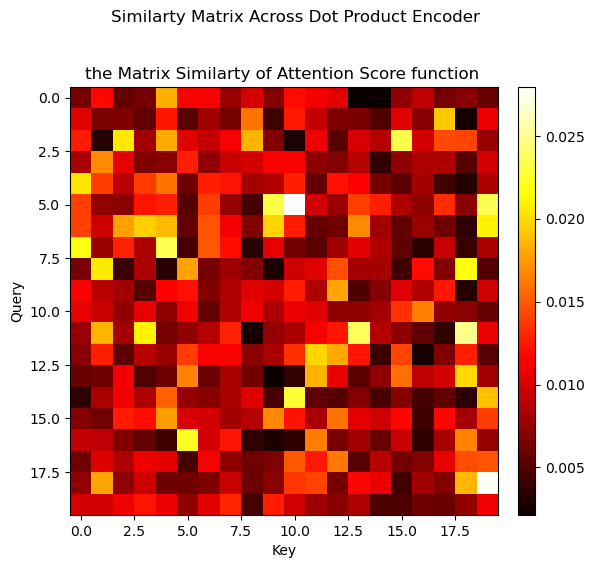

In [6]:
fig , axe = plt.subplots(1 , 1 , figsize=(6,6))
axe.set_title("the Matrix Similarty of Attention Score function ")
axe.set_xlabel("Key")
axe.set_ylabel("Query")
im =axe.imshow(atten[0][:20,:20], cmap="hot",interpolation="nearest")
divider = make_axes_locatable(axe)
cax = divider.append_axes("right", size="4%", pad=0.2)
cbar = plt.colorbar(im, cax=cax)
fig.canvas.draw()
fig.suptitle("Similarty Matrix Across Dot Product Encoder")

plt.show()


<div style="background-color: #f5f5f5; padding: 10px; border-radius: 5px;">
    <div class="card mt-3">
        <div class="card-body">
            <h2 class="card-title text-center mb-4">Explain mechanism of Mask-Self-Attention in Decoder Part</h2>
            <p>here only diffrent between prevouis Self-Attention is that Self-attention in decoders is slightly different than in encoders. The encoder receives all the tokens at once and the tokens can see all the tokens in the input sentence, but the decoder generates one token at a time. During creation, you don't know which tokens you will create in the future.

To prevent the decoder from looking ahead, the model uses masked self-attention. Future tokens are masked.</p>
          <li><strong>Final stage</strong><center>
 ##### Softmax with Mask
              
We apply a softmax function to the Similarity matrix after adding the mask matrix:

\begin{equation*}
\mathbf{S} = \text{softmax}(\text{Similarity}(\mathbf{Q}, \mathbf{K}) + \mathbf{M}) = \text{softmax}\left(\frac{\mathbf{Q} \mathbf{K}^T}{\sqrt{d_k}} + \mathbf{M}\right)
\end{equation*}

Here, $\mathbf{M}$ is a mask matrix that prevents the decoder from "looking ahead" in the sequence during training. It has the same dimensions as the Similarity matrix and is typically a lower-triangular matrix.

This modified Self-Attention mechanism formula can be summarized as follows:

\begin{equation*}
\text{Self-Attention}(\mathbf{Q}, \mathbf{K}, \mathbf{V}, \mathbf{M}) = \text{softmax}\left(\frac{\mathbf{Q} \mathbf{K}^T}{\sqrt{d_k}} + \mathbf{M}\right) \mathbf{V}
\end{equation*}

where $\mathbf{Q}$, $\mathbf{K}$, and $\mathbf{V}$ are the Query, Key, and Value matrices, respectively, and $d_k$ is the dimensionality of the Key matrix.</br>
   </center></li></ul>
  </div>
    </div>
    </div>
    

In [7]:
out_wieghts_Averege , atten = Self_Attention(input_embedding.numpy(),
                                     WieghtMatrix_QKV.detach().numpy().T,
                                     out_Wieghts.detach().numpy().T,  
                                     mask=Mask.numpy(),batch_first=True)
                                     
                                   

<div style="background-color: #f5f5f5; padding: 10px; border-radius: 5px;">
    <div class="card mt-3">
        <div class="card-body">
            <h2 class="card-title text-center mb-4">Simulation of Masked-Attention Learning at Stage Decoder Part</h2>
            <center><img src="https://wikidocs.net/images/page/178172/Fig_08_05_masked_self_attn.gif" width="400" height="200"/></center>
    <div style="font-size: 14px;"> A simulation of Masked Self-Attention mechanism used in the Decoder stage of a Transformer model. The mechanism prevents the model from "looking ahead" in the sequence during training, ensuring that it only generates output tokens based on previously generated tokens..</div>
</div>
  </div>
    </div>


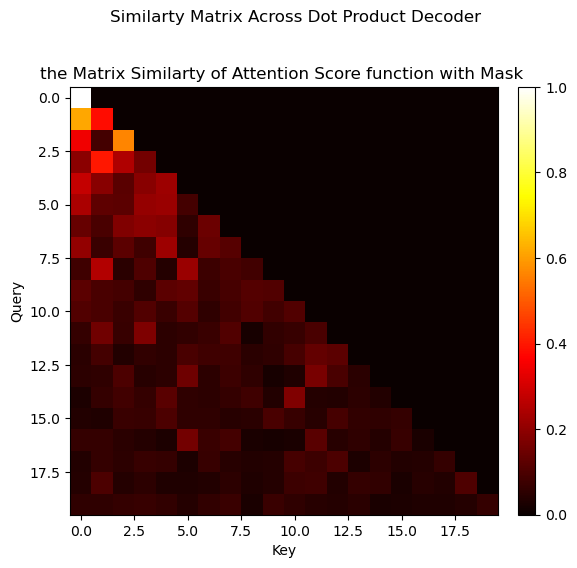

In [8]:
fig , axe = plt.subplots(1 , 1 , figsize=(6,6))
axe.set_title("the Matrix Similarty of Attention Score function with Mask ")
axe.set_xlabel("Key")
axe.set_ylabel("Query")
im =axe.imshow(atten[0][:20,:20], cmap="hot",interpolation="nearest")
divider = make_axes_locatable(axe)
cax = divider.append_axes("right", size="4%", pad=0.2)
cbar = plt.colorbar(im, cax=cax)
fig.canvas.draw()
fig.suptitle("Similarty Matrix Across Dot Product Decoder")

plt.show()


<div style="background-color: #f5f5f5; padding: 10px; border-radius: 5px;">
    <div class="card mt-3">
        <div class="card-body">
            <h2 class="card-title text-center mb-4">Multi-Heads Self-Attention</h2>
            <p>In the Transformer, the Attention module repeats its computations multiple times in parallel. Each of these is called an Attention Head. The Attention module splits its Query, Key, and Value parameters N-ways and passes each split independently through a separate Head. All of these similar Attention calculations are then combined together to produce a final Attention score. This is called Multi-head attention and gives the Transformer greater power to encode multiple relationships and nuances for each word.:</p>
            <center><img src="https://data-science-blog.com/wp-content/uploads/2022/01/mha_img_original.png" title="Attention(Q,K,V)=softmax(QKT/sqrt(d_k))V" style="background-color:gray; padding: 10px; border-radius: 5px;" width="400" height="200"/>
</center>
            <center>
                <p>So we need to make the model focus on something else. This is the motivation behind Multi-Head Attention. Instead of using one attention mechanism, multi-head attention has multiple “heads” that work independently</p>
                <img src="https://miro.medium.com/v2/resize:fit:786/0*X0c962yMhgRKfMTD.gif" width="400" height="200" title="Attention(Q,K,V)=softmax(QKT/sqrt(d_k))V" style="background-color:gray; padding: 10px; border-radius: 5px;"/>
            </center>
        </div>
    </div>
</div>

<div style="background-color: #f5f5f5; padding: 10px; border-radius: 5px;">
    <div class="card mt-3">
        <div class="card-body">
            <h2 class="card-title text-center mb-4">Multi-Heads Self-Attention mathematic proof</h2>
            <center>
                <img src="https://wikidocs.net/images/page/178172/Fig_08_06_multi_head.gif" width="400" height="200" title="Attention(Q,K,V)=softmax(QKT/sqrt(d_k))V" style="background-color:gray; padding: 10px; border-radius: 5px;"/>
                <p>this is implemented as several attention mechanisms whose outcomes are combined.
The implementation simply splits the queries, keys, and values ​​it computes into parts for single-head attention. In this way, models with one or more attention heads are the same size. Multi-head attention does not increase model size.</p>
            </center>   
            <strong>Proof : </strong>
<p>Let $\mathbf{E} = [\mathbf{e_1}, \mathbf{e_2}, \ldots, \mathbf{e_n}]$ be a sequence of $n$ embeddings.</p>
    <p>We create $h$ sets of learnable projection matrices $\mathbf{W_Q^h}$, $\mathbf{W_K^h}$, and $\mathbf{W_V^h}$, where $h$ is the number of attention heads.</p>
    <p>For each head $h$, we compute the Query ($\mathbf{Q^h}$), Key ($\mathbf{K^h}$), and Value ($\mathbf{V^h}$) matrices as follows:</p>
    <ul>
        <li>$\mathbf{Q_i^h} = \mathbf{W_Q^h} \mathbf{e_i}$</li>
        <li>$\mathbf{K_i^h} = \mathbf{W_K^h} \mathbf{e_i}$</li>
        <li>$\mathbf{V_i^h} = \mathbf{W_V^h} \mathbf{e_i}$</li>
    </ul>
<p>We then compute the dot-product similarity between the Query and Key matrices:</p>
<p>$$\text{Similarity}(\mathbf{Q^h}, \mathbf{K^h}) = \frac{\mathbf{Q^h} \mathbf{K^h}^T}{\sqrt{d_k}}$$</code></pre>
    <p>where $d_k$ is the dimension of the Key matrix.</p>
    <p>We apply a softmax function to the Similarity matrix:</p>
    <p>$$\mathbf{S^h} = \text{softmax}(\text{Similarity}(\mathbf{Q^h}, \mathbf{K^h})) = \text{softmax}(\frac{\mathbf{Q^h} \mathbf{K^h}^T}{\sqrt{d_k}})$$</code></pre>
    <p>We compute the weighted sum of the Value matrix using the Softmax weights:</p>
    <p>$$\text{Weighted Sum}(\mathbf{V^h}, \mathbf{S^h}) = \mathbf{S^h} \mathbf{V^h}$$</code></pre>
    <p>We concatenate the output matrices from all heads together:</p>
    <p>$$\text{Output} = [\text{Weighted Sum}(\mathbf{V^1}, \mathbf{S^1}), \text{Weighted Sum}(\mathbf{V^2}, \mathbf{S^2}), \ldots, \text{Weighted Sum}(\mathbf{V^h}, \mathbf{S^h})]$$</code></pre>
    <p>This results in a matrix of size $n \times d_v h$, where $d_v$ is the number of features in each Value vector.</p>
         </div>
    </div>
</div>
            

In [9]:
# in here all what we dissccu stay the same only
# we split the input emdebbing in to multi-dim of each Q , K . Y 
# because the Attention have the poeweful compute in Parallel manner 

def multiHeads_Attention(input_embedding ,wieghtsMatrix_QKY , heads ,out_Wieght , mask=None):
    B , seq_len , embed_size = input_embedding.shape
    # we have dim input of B . seq_len , 
    # embed_size ==> B, seq_len , embed_size/ heads 
    #=> Swape axis into [batch , heads , seq_len , embe_size / heads ]
    Query , Key, Value = np.split(input_embedding@wieghtsMatrix_QKY,3, axis=-1)
    Query , Key, Value = [a.reshape(B , seq_len ,heads , (embed_size // heads)).swapaxes(1,2) for a in (Query , Key, Value)]
    if mask is not None:
        atten = Softmax(Key@Query.swapaxes(-1,-2) / np.sqrt(embed_size // heads) + mask ) 
        return (atten@Value).swapaxes(1,2).reshape(B , seq_len , embed_size)@out_Wieght , atten
    else:
        atten = Softmax(Key@Query.swapaxes(-1,-2) / np.sqrt(embed_size // heads)) 
        return (atten@Value).swapaxes(1,2).reshape(B , seq_len , embed_size)@out_Wieght , atten

In [10]:
## intialize the input 
batch,lenght_sequnece , embedding_size = 1,100 , 64 
number_heads = 2
# now we will stand out with single Attetion heads 
input_embedding = torch.randn(batch,lenght_sequnece, embedding_size)
atten = nn.MultiheadAttention(embedding_size,number_heads, bias = False,batch_first=True)
## intialzie the Mask 
Mask = torch.triu(-float("inf")*torch.ones(lenght_sequnece,lenght_sequnece),1)       
out_weight_average , attention = atten(input_embedding,input_embedding,input_embedding,attn_mask=Mask)                  

In [11]:
## Our Multi-Heads Attention 
WieghtMatrix = atten.in_proj_weight
out_Wieght = atten.out_proj.weight
out_wieghts_Averege , atten = multiHeads_Attention(input_embedding.numpy(),
                                     WieghtMatrix.detach().numpy().T,
                                     number_heads,
                                     out_Wieght.detach().numpy().T,  
                                     mask=Mask.numpy())
                                     

<div style="background-color: #f5f5f5; padding: 10px; border-radius: 5px;">
    <div class="card mt-3">
        <div class="card-body">
            <h2 class="card-title text-center mb-4">Transfomers</h2>
            <p>Now that you understand the main model components and the general idea, let's take a look at the full model.Intuitively, the model is exactly what we discussed before. In the encoder, the tokens communicate with each other and update their representation. In the decoder, the target token first looks at the previously generated target token, then the source, and finally updates its representation. This happens in multiple layers, usually 6.

Let's take a closer look at the other model components. :</p>
            <center><img src="https://wikidocs.net/images/page/178172/Fig_09_01.png" title="Attention(Q,K,V)=softmax(QKT/sqrt(d_k))V" style="background-color:gray; padding: 10px; border-radius: 5px;"/>
            </center>
            <strong>Notation : </strong><p> in Next section we will cover other building blocks componemts in TRANSFIMERS</p>
        </div>
    </div>
</div>

<div style="background-color: #f5f5f5; padding: 10px; border-radius: 5px;">
    <div class="card mt-3">
        <div class="card-body">
            <h2 class="card-title text-center mb-4">Token Embedding</h2>
            <p>to train the Transfomer model we need to convert the input of word in to vector representation embedding which is BERT model </p>
        </div>
    </div>
</div>

In [12]:
class Embedding(nn.Module):
    def __init__(self , seq_len , embed_size):
        super(Embedding,self).__init__()
        """
        Args:
            vocab_size: size of vocabulary
            embed_dim: dimension of embeddings
        """
        self.embedding = nn.Embedding(seq_len , embed_size)
    def forward(self,x):
        """
        Args:
            x: input vector
        Returns:
            out: embedding vector
        """
        embed = self.embedding(x)
        return embed

<div style="background-color: #f5f5f5; padding: 10px; border-radius: 5px;">
    <div class="card mt-3">
        <div class="card-body">
            <h2 class="card-title text-center mb-4">Positional embedding</h2>
            <p>Transformers do not involve recurrence or convolution, so they do not know the order of the input tokens. Therefore, we need to explicitly tell the model where the token is. There are two sets of embeddings for this. These are tokens (as we always have) and positions (new embeddings needed for this model). Then the input representation of the token is the sum of its two embeddings: the token and the position.
                
Unlike RNNs, which recurrently process tokens of a sequence one by one, self-attention ditches sequential operations in favor of parallel computation. Note, however, that self-attention by itself does not preserve the order of the sequence. What do we do if it really matters that the model knows in which order the input sequence arrived?</p>
            <center><img src="https://wikidocs.net/images/page/178172/Fig_09_05.png" title="Attention(Q,K,V)=softmax(QKT/sqrt(d_k))V" style="background-color:gray; padding: 10px; border-radius: 5px;" width="400" height="200"/>
                <p></p>
</center>
            <center>
                <p>Positional embeddings can be trained, but the authors of the paper found that fixed embeddings did not affect quality. The fixed positional encodings used by Transformer are: \begin{split}\begin{aligned} p_{i, 2j} &= \sin\left(\frac{i}{10000^{2j/d}}\right),\\p_{i, 2j+1} &= \cos\left(\frac{i}{10000^{2j/d}}\right).\end{aligned}\end{split}</p>
            </center>
        </div>
    </div>
</div>

In [13]:
class PositionalEncoding(nn.Module):
    """
    compute sinusoid encoding.
    """
    def __init__(self, d_model, max_len, device):
        """
        constructor of sinusoid encoding class

        :param d_model: dimension of model
        :param max_len: max sequence length
        :param device: hardware device setting
        """
        super(PositionalEncoding, self).__init__()

        # same size with input matrix (for adding with input matrix)
        self.encoding = torch.zeros(max_len, d_model, device=device)
        self.encoding.requires_grad = False  # we don't need to compute gradient

        pos = torch.arange(0, max_len, device=device)
        pos = pos.float().unsqueeze(dim=1)
        # 1D => 2D unsqueeze to represent word's position

        _2i = torch.arange(0, d_model, step=2, device=device).float()
        # 'i' means index of d_model (e.g. embedding size = 50, 'i' = [0,50])
        # "step=2" means 'i' multiplied with two (same with 2 * i)

        self.encoding[:, 0::2] = torch.sin(pos / (10000 ** (_2i / d_model)))
        self.encoding[:, 1::2] = torch.cos(pos / (10000 ** (_2i / d_model)))
        # compute positional encoding to consider positional information of words

    def forward(self, x):
        # self.encoding
        # [max_len = 512, d_model = 512]

        batch_size, seq_len = x.size()
        # [batch_size = 128, seq_len = 30]

        return self.encoding[:seq_len, :]
        # [seq_len = 30, d_model = 512]
        # it will add with tok_emb : [128, 30, 512]         

In [14]:
## intialize the input 
batch , max_len , encoding_dim = 1,100 , 100
pos_embedding = torch.randn(batch,max_len, encoding_dim)
pos_encoding = PositionalEncoding(encoding_dim, max_len,'cpu')
pos = pos_encoding(torch.zeros((batch, max_len)))


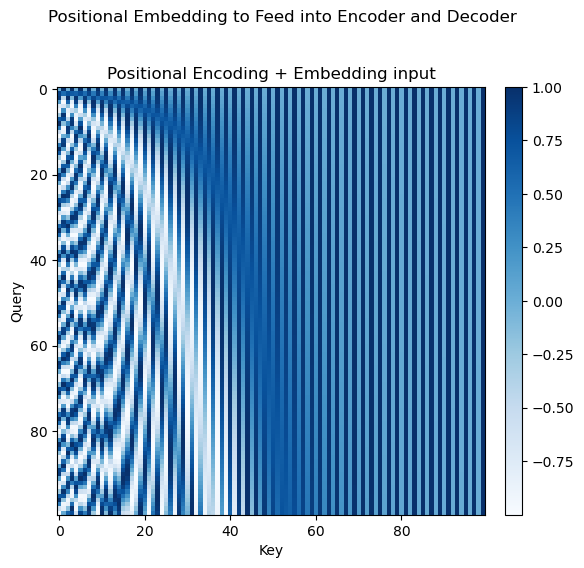

In [15]:
fig , axe = plt.subplots(1 , 1 , figsize=(6,6))
axe.set_title("Positional Encoding + Embedding input")
axe.set_xlabel("Key")
axe.set_ylabel("Query")
im =axe.imshow(pos, cmap="Blues",interpolation="nearest")
divider = make_axes_locatable(axe)
cax = divider.append_axes("right", size="4%", pad=0.2)
cbar = plt.colorbar(im, cax=cax)
fig.canvas.draw()
fig.suptitle("Positional Embedding to Feed into Encoder and Decoder")

plt.show()


<div style="background-color: #f5f5f5; padding: 10px; border-radius: 5px;">
    <div class="card mt-3">
        <div class="card-body">
            <h2 class="card-title text-center mb-4">Residual connections </h2>
            <p>We already saw residual connections when talking about convolutional language models. Residual connections are very simple (add a block's input to its output), but at the same time very useful. You can smooth out the gradient flow through the network and stack many layers.

In Transformer, residual connections ((residual connections)) are used after each attention() and FFN block. In the picture above, the residuals are indicated by arrows coming around the block for the yellow "Add & Norm" layer. In the "Add & Norm" section, the "Add" section represents the residual connection</p>
            <center><img src="https://wikidocs.net/images/page/178172/Fig_09_03.png" title="Attention(Q,K,V)=softmax(QKT/sqrt(d_k))V" style="background-color:gray; padding: 10px; border-radius: 5px;" width="400" height="200"/></center>
        </div>
    </div>
</div>

In [16]:
class ResidualCennection(nn.Module):
    def __init__(self,x, residual):
        super(ResidualCennection,self).__init__()
        self.pass_trough = x
        self.addtion = residual
    def forward(self,*args, **kwargs):
        x = self.pass_trough
        return x + self.addtion

<div style="background-color: #f5f5f5; padding: 10px; border-radius: 5px;">
    <div class="card mt-3">
        <div class="card-body">
            <h2 class="card-title text-center mb-4">Positionwise Feed Forward</h2>
            <p>In addition to attention, each layer has a feedforward network block. There is a ReLU nonlinearity between the two linear layers. After looking at other tokens via the attention mechanism, the model processes this new information using the FFN block (attention - "gathers information by looking at other tokens",FFN "Take time to think and process this information")</p>
            <center><img src="https://wikidocs.net/images/page/178172/Fig_09_02.png" title="Attention(Q,K,V)=softmax(QKT/sqrt(d_k))V" style="background-color:gray; padding: 10px; border-radius: 5px;" width="400" height="200"/>
                $$FFN(x) = \max(0, xW_1+b_1)W_2+b_2.$$
            </center>
        </div>
    </div>
</div>

In [17]:
class FeedForwrdNetwork(nn.Module):
    def __init__(self,embed_size , hidden_size , dropout_pro=0.1):
        super(FeedForwrdNetwork,self).__init__()
        self.Linear_1= nn.Linear(embed_size,hidden_size)
        self.Linear_2= nn.Linear(hidden_size,embed_size)
        self.act = nn.ReLU()
        self.dropout = nn.Dropout(p=dropout_pro)
    def forward(self,x):
        x = self.Linear_1(x)
        x = self.act(x)
        x = self.Linear_2(x)
        x = self.dropout(x)
        return x

<div style="background-color: #f5f5f5; padding: 10px; border-radius: 5px;">
    <div class="card mt-3">
        <div class="card-body">
            <h2 class="card-title text-center mb-4">Layer Normalization</h2>
            <p>The "Norm" part of the "Add & Norm" layer Layer Normalization represents . Normalize the vector representation of each example collectively and independently. This is done to control the "flow/flow" to the next layer. Layer normalization improves convergence stability and sometimes quality.
In Transformer, we need to normalize the vector representation of each token. Also here LayerNorm is a learnable parameter that is used after normalization to rescale the layer's output (or the next layer's input).
and There is. and is evaluated for each example, but and is the same. This is a layer parameter. </p>
            <center><img src="https://github.com/hyunwoongko/transformer/raw/master/image/layer_norm.jpg" title="Attention(Q,K,V)=softmax(QKT/sqrt(d_k))V" style="background-color:gray; padding: 10px; border-radius: 5px;" width="500" height="300"/></center>
        </div>
    </div>
</div>

In [18]:
class NormLayer(nn.Module):
    def __init__(self,embed_size , eps=1e-12):
        super(NormLayar, self).__init__()
        self.embed_size = embed_size
        self.gamma = nn.Parameter(torch.ones(embed_size))
        self.beta = nn.Parameter(torch.zeros(embed_size))
        self.eps = eps
    def forward(self,x):
        mean = x.mean(-1, keepdims= True)
        var = x.var(-1 , unbiased=False , keepdims= True)
        out = ( x - mean ) / torch.sqrt(var + self.eps)
        out = self.gamma * out + self.beta

<div style="background-color: #f5f5f5; padding: 10px; border-radius: 5px;">
    <div class="card mt-3">
        <div class="card-body">
            <h2 class="card-title text-center mb-4"> Final Stage put all the pieces together to build Transfomers</h2>
            <p>Now that you understand the main model components and the general idea, let's take a look at how to build the Full Transfomers model by combining all the componentes al once .

Let's take a closer look at the other model components. :</p>
            <center><img src="https://caisplusplus.usc.edu/images/curriculum/neural-network-flavors/transformers/transformer.png" title="Attention(Q,K,V)=softmax(QKT/sqrt(d_k))V" style="background-color:gray; padding: 10px; border-radius: 5px;" width="400" height="300"/>
            </center>
            <strong>Notation : </strong><p> in Next section we will cover other building FULL componemts in TRANSFIMERS</p>
        </div>
    </div>
</div>

In [19]:
def NormLayar(Z):
    mean = Z.mean(axis=-1 , keepdims=True)
    var = Z.var(axis=-1 , keepdims = True)
    return ((Z - mean) / np.sqrt(var)) + eps

def ReLU(Z):
    return np.maximum(Z,0)

In [20]:
## intialize the input 
batch,lenght_sequnece , embedding_size = 1,100 , 64 
number_heads = 2
# now we will stand out with single Attetion heads 
input_embedding = torch.randn(batch,lenght_sequnece, embedding_size)
## intialzie the Mask 
Mask = torch.triu(-float("inf")*torch.ones(lenght_sequnece,lenght_sequnece),1)       


In [21]:
transEncoder = nn.TransformerEncoderLayer(embedding_size,number_heads,dim_feedforward=64,dropout=0.0,batch_first=True)
output = transEncoder(input_embedding,Mask)
output.shape

torch.Size([1, 100, 64])

In [22]:
## let's build first Transfomer Encode
def TransfomerEncoder(embed_input,mask ,
                      head, Wieghts_QKY , 
                      Wieghts_out ,FullyLinear1, 
                      FullLinear2 , eps):
    input_embedding = embed_input.numpy()
    multiHeads , _ = multiHeads_Attention(input_embedding,
                                     Wieghts_QKY.detach().numpy().T,
                                     head,
                                     Wieghts_out.detach().numpy().T,  
                                     mask=None)
    Residual = NormLayar((input_embedding + multiHeads) + eps )
    
    output = NormLayar((Residual + ReLU(np.matmul(Residual,FullyLinear1))@FullLinear2) + eps)
    return output

In [23]:
WieghtMatrix = transEncoder.self_attn.in_proj_weight
out_Wieght = transEncoder.self_attn.out_proj.weight
Liearn1 = transEncoder.linear1.weight
Linear2 = transEncoder.linear2.weight
eps=1e-12
output_ = TransfomerEncoder(input_embedding,Mask ,
                      number_heads, WieghtMatrix , 
                      out_Wieght ,Liearn1.detach().numpy().T, 
                      Linear2.detach().numpy().T , eps)
output_.shape

(1, 100, 64)

In [24]:
# compare between TransfomerEncoerLayae Torch and Our 
np.linalg.norm(output_ - output.detach().numpy())

10.422704

In [25]:
memory = torch.triu(-float("inf")*torch.ones(lenght_sequnece,embedding_size),1).unsqueeze(1).transpose(1,0)

In [26]:
memory.shape

torch.Size([1, 100, 64])

In [27]:
transDecoder = nn.TransformerDecoderLayer(embedding_size ,number_heads , dim_feedforward=128 , batch_first=True)
output_decoder = transDecoder(input_embedding,memory)
output_decoder.shape

torch.Size([1, 100, 64])

In [28]:
WieghtMatrix = transDecoder.self_attn.in_proj_weight
out_Wieght = transDecoder.self_attn.out_proj.weight
Liearn1 = transDecoder.linear1.weight
Linear2 = transDecoder.linear2.weight

In [29]:
def TransfomerDecoder(embed_input,mask ,
                      head, Wieghts_QKY , 
                      Wieghts_out ,FullyLinear1, 
                      FullLinear2 , eps,enc=None):
    input_embedding = embed_input.numpy()
    multiHeads , _ = multiHeads_Attention(input_embedding,
                                     Wieghts_QKY.detach().numpy().T,
                                     head,
                                     Wieghts_out.detach().numpy().T,  
                                     mask=None)
    Residual = NormLayar((input_embedding + multiHeads) + eps )
    
    if enc is not None:
        Query , key  = np.split(enc , 2 , axis=-1)
        enc_ = np.concatenate((Query[:,:,:16] , key[:,:,:16]  ,Residual[:,:,:32] ), axis = -1)
        MaskedMUltiHeads ,_= multiHeads_Attention(enc_,
                                         Wieghts_QKY.detach().numpy().T,
                                         head,
                                         Wieghts_out.detach().numpy().T,  
                                         mask=mask.numpy())
        Residual = NormLayar((enc + MaskedMUltiHeads) + eps )
    
    output = NormLayar((Residual + ReLU(np.matmul(Residual,FullyLinear1))@FullLinear2) + eps)
    return output

In [30]:
output_decoder_ = TransfomerDecoder(input_embedding,Mask ,
                      number_heads, WieghtMatrix , 
                      out_Wieght ,Liearn1.detach().numpy().T, 
                      Linear2.detach().numpy().T ,eps,enc=output_)
output_decoder_.shape

(1, 100, 64)

In [31]:
np.linalg.norm(output_decoder_ - output_decoder.detach().numpy())

nan

In [32]:
class Transformer:
    def __init__(self, embedding_size , heads):
        super(Transformer,self).__init__()
        
        """
        Blocks models
        -------------
        encoder : is used without the Mask at this stage 
        Decoder : include the Mask and with trick to split the Qurey and Key 
        
        Parametes :
        Wieghst_QKY_Encoder : is Leanrble wieght matrix feed into Encoder
        Wieghst_QKY_Decoder : is Leanrble wieght matrix feed into ncoder
        embed_size : is mebeding_size dimession of input 
        Seq_len : max lenght of vacolublaries 
        Linear_1 : Linear Denes layar of Deooder
        Linear_2 : Linear Denes layar of Deooder after include the ooutput from Encoder
        Linear_encoder : Linear Denes layar of Enooder
        """
    
        self.embed_input = embedding_size
        self.heads = heads 
        self.eps = 1e-12
        self.W_QKY_Encoder = transEncoder.self_attn.in_proj_weight
        self.W_Out_Encoder = transEncoder.self_attn.out_proj.weight
        self.W_QKY_Decoder = transDecoder.self_attn.in_proj_weight
        self.W_Out_Decoder = transDecoder.self_attn.out_proj.weight
        self.Linear1_Encoder = transEncoder.linear1.weight
        self.Linear2_Encoder = transEncoder.linear2.weight
        self.Linear1_Decoder = transDecoder.linear1.weight
        self.Linear2_Decoder = transDecoder.linear2.weight
    
    def forward(self, enc_ , dec_, mask):
        Encoder_= TransfomerEncoder(enc_ ,None ,
                  self.heads, self.W_QKY_Encoder , 
                  self.W_Out_Encoder ,self.Linear1_Encoder.detach().numpy().T, 
                  self.Linear2_Encoder.detach().numpy().T , self.eps)

        Decoder_ = TransfomerDecoder(dec_, mask ,
                  self.heads, self.W_QKY_Decoder , 
                  self.W_Out_Decoder , self.Linear1_Decoder.detach().numpy().T, 
                  self.Linear2_Decoder.detach().numpy().T ,self.eps,enc=Encoder_)

        return Decoder_

        

In [33]:
## intialize the input 
batch,lenght_sequnece , embedding_size = 1,100 , 64 
heads = 2
# now we will stand out with single Attetion heads 
input_embedding = torch.randn(batch,lenght_sequnece, embedding_size)
## intialzie the Mask 
Mask = torch.triu(-float("inf")*torch.ones(lenght_sequnece,lenght_sequnece),1)       

Trans = Transformer(embedding_size,heads)
output=Trans.forward(input_embedding,input_embedding,Mask)
output.shape

(1, 100, 64)

<div style="background-color: #f5f5f5; padding: 10px; border-radius: 5px;">
    <div class="card mt-3">
        <div class="card-body">
            <h2 class="card-title text-center mb-4"> Torch Version Transfomers</h2>
            <p>Now that you built Numpy version from Scratch, in DL actually we will use Pytorch and we wil do training of the model Translation , now let us build Transfomers , only we do is Combine the componentes of Transfomers we built Already  </p>
        </div>
    </div>
</div>

<div style="background-color: #f5f5f5; padding: 10px; border-radius: 5px;">
    <div class="card mt-3">
        <div class="card-body">
            <h2 class="card-title text-center mb-4"> Final Stage put all the pieces together to build Transfomers</h2>
            <p>Now that you understand the main model components and the general idea, let's take a look at how to build the Full Transfomers model by combining all the componentes al once .

Let's take a closer look at the other model components. :</p>
            <center><img src="https://caisplusplus.usc.edu/images/curriculum/neural-network-flavors/transformers/transformer.png" title="Attention(Q,K,V)=softmax(QKT/sqrt(d_k))V" style="background-color:gray; padding: 10px; border-radius: 5px;" width="400" height="300"/>
            </center>
            <strong>Notation : </strong><p> in Next section we will cover other building FULL componemts in TRANSFIMERS</p>
        </div>
    </div>
</div>

In [34]:
class ScaleProduct(nn.Module):
    def __init__(self):
        super(ScaleProduct, self).__init__()
        self.Softmax = nn.Softmax(dim=-1)
    def forward(self,query , key , value , mask = None , eps = 1e-12):
        batch , heads , seq_len , embed_size = key.size()
        # product query , key 
        key_t = key.transpose(2,3)
        dot_product = (query@key_t) / torch.sqrt(embed_size)
        
        if mask is not None: 
            Score = dot_product.masked_fill(mask == 0,-10000)
        
        compute_similarty = self.Softmax(Score)
        
        value = compute_similarty @ self.value
        
        return value , Score 
        

In [35]:
## Let us Build first multi-Heads-Attention

class MultiHeadAttention(nn.Module):
    def __init__(self,embed_size , heads):
        super(MultiHeadAttention,self).__iniy__()
        self.heads = heads 
        self.Query = nn.Linear(embed_size ,embed_size)
        self.Key = nn.Linear(embed_size ,embed_size)
        self.Value = nn.Linear(embed_size ,embed_size)
        self.concat = nn.Linear(embed_size ,embed_size)
        self.Scale_product = ScaleProduct()
    
    def forward(self , query , key , value , mask=None):
        query , key , value = self.Query(query),self.Key(key) , self.Value(value)
        query_dim , key_dim , value_dim = self.split_dim(query),self.split_dim(key),self.split_dim(value)        
        Socore , _ = self.Scale_product(query_dim , key_dim , value_dim , mask = mask)
        concating_dim = self.concating(Socore)
        out = self.concat(concating_dim)
        return out
    def split_dim(self , tensor):
        """
        input_dim ==> [batch , seq_len , embed_size]
        split into sub-dims ==> [bacth , seq_len , heads , embed_size / numberHeads ]
        where : 
            INTERSTRED DIMES ARE SEQ_LEN AND EMBED_SIZE 
            WE WILL TARSNSPOSE THEM BETWEEN DIMS 
        """
        batch , seq,_len , embed_size = tensor.size()
        
        tensor = tensor.view(batch,seq_len , heads , embed_size // self.heads).transpose(1,2)
        return tensor
    
    def concating(self, tensor):
        bacth , heads , seq_len , embed_size = tensor.size()
        tensor = tensor.transpose(2,1).contiguous()
        tensor = tensor.reshape(batch , seq_len , heads*embed_size)
        return tensor

In [36]:
class Embedding(nn.Module):
    def __init__(self,seq_len,embed_size):
        super(Embedding,self).__init__()
        self.embedding_input= nn.Embedding(seq_len,embed_size)
    def forward(self , x ):
        x = self.embedding_input(embed_size,seq_len)
        return x

In [37]:
class TokenPositional(nn.Module):
    def __init(self,embed_size,seq_len,drop_pro ,device):
        super(TokenPositional).__init__()
        self.Positional = PositionalEncoding(embed_size,seq_len,device)
        self.Embeddding = Embedding(seq_len,embed_size)
        self.Dropout = nn.Dropout(drop_pro)
    def forward(self,x):
        emd =  self.Embeddding(x)
        posi = self.Positional(x)
        return self.Dropout(emd + posi)

In [38]:
class EncoderLayer(nn.Module):
    def __init__(self, embed_size , heads, hidden_dim , drop_pro):
        super(EncoderLayar,self).__init__()
        self.MultiHeadAttention = MultiHeadAttention(embed_size , heads)
        self.NormLayer1= NormLayer(embed_size)
        self.NormLayer2= NormLayer(embed_size)
        self.FeedForward = FeedForwrdNetwork(embed_size,hidden_dim)
        self.Dropout_1 = nn.Dropout(drop_pro)
        self.Dropout_2 = nn.Dropout(drop_pro)

    def forward(self, x,mask):
        x_ = x
        x = self.MultiHeadAttention(query=x , key=x , value=x , mask=mask)
        x = self.Dropout_1(x)
        x = self.NormLayer1(x  + x_)
        x_ = x 
        x = self.FeedForward(x)
        fnn = self.Dropout_2(x)
        x = self.NormLayer2(x + x_)
        return x      

In [39]:
class Encoder(nn.Module):
    def __init__(self,embed_size , seq_len , heads , hidden_dim, drop_pro, StackLayers,device):
        super(Encoder,self).__init__()
        self.InputEmbedding = TokenPositional(embed_size,
                                              seq_len,
                                              drop_pro, 
                                              device)
        self.EncoderLayer = nn.ModuleList([EncoderLayer(embed_size , heads, hidden_dim , drop_pro) 
                                          for _ in range(StackLayers)])
        
    def forward(self ,x , src_mask):
        x = self.InputEmbedding(x)
        for layer in self.EncoderLayer:
            x - layer(x , mask)
            return x     

In [40]:
class DecoderLayer:
    pass 

<center>
    <div class="alert alert-danger" role="alert"> <strong>this notebook still under progress Transfomer in Depth</strong>
    </div>
<img src="https://img.shields.io/badge/Upvote-If%20you%20like%20my%20work-07b3c8?style=for-the-badge&logo=kaggle">
</center>
